<a href="https://colab.research.google.com/github/PranaySaha97/Machine-Learning-Simple-Projects/blob/master/Online_Shopper's_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><string><center>Online Shopper's Intention<center><strong></h1>
<hr>
<b>Date: </b>02/12/2019<br>
<b>Author: </b> Pranay Saha



# **Data Loading and Preparing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_dir='/content/drive/My Drive/Colab Notebooks/online_shoppers_intention.csv'

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
data= pd.read_csv(data_dir)
data.shape

(12330, 18)

In [5]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
data.describe

<bound method NDFrame.describe of        Administrative  Administrative_Duration  ...  Weekend  Revenue
0                 0.0                      0.0  ...    False    False
1                 0.0                      0.0  ...    False    False
2                 0.0                     -1.0  ...    False    False
3                 0.0                      0.0  ...    False    False
4                 0.0                      0.0  ...     True    False
...               ...                      ...  ...      ...      ...
12325             3.0                    145.0  ...     True    False
12326             0.0                      0.0  ...     True    False
12327             0.0                      0.0  ...     True    False
12328             4.0                     75.0  ...    False    False
12329             0.0                      0.0  ...     True    False

[12330 rows x 18 columns]>

In [7]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [8]:
for col in data.columns:
  if data[col].isnull().any():
    print(col)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates


In [0]:
data_without_na= data.dropna()

In [10]:
print(data_without_na.shape)
data_without_na.head(5)

(12316, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [0]:
# data_with_na= data.fillna(data.mean, inplace=True)
# data_with_na.head()
# impute= Imputer(missing_values=np.nan, strategy='mean', axis=1)
# data_with_na= pd.DataFrame(impute.fit_transform(data))

In [0]:
data= data_without_na

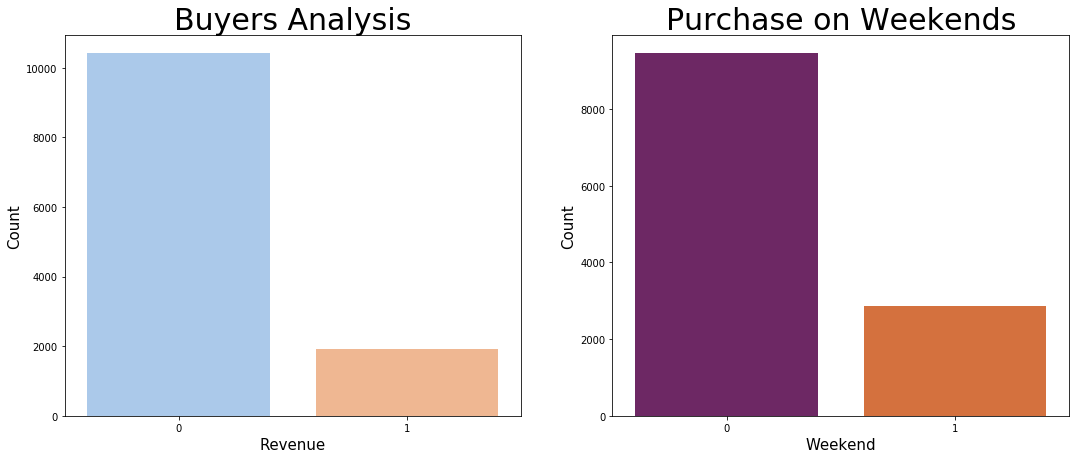

In [104]:
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (18, 7)
plt.subplot(1, 2, 1)
sns.countplot(data['Revenue'], palette = 'pastel')
plt.title('Buyers Analysis', fontsize = 30)
plt.xlabel('Revenue', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [14]:
data['Revenue'].value_counts()

False    10408
True      1908
Name: Revenue, dtype: int64

In [15]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# **Clustering Analysis**

In [16]:
data['VisitorType'].value_counts()

Returning_Visitor    10537
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [17]:
data['OperatingSystems'].value_counts()

2    6593
1    2582
3    2552
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [18]:
data['SpecialDay'].value_counts()

0.0    11065
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [19]:
data['Region'].value_counts()

1    4774
3    2402
4    1179
2    1134
6     804
7     761
9     511
8     434
5     317
Name: Region, dtype: int64

# **Feature Selection**

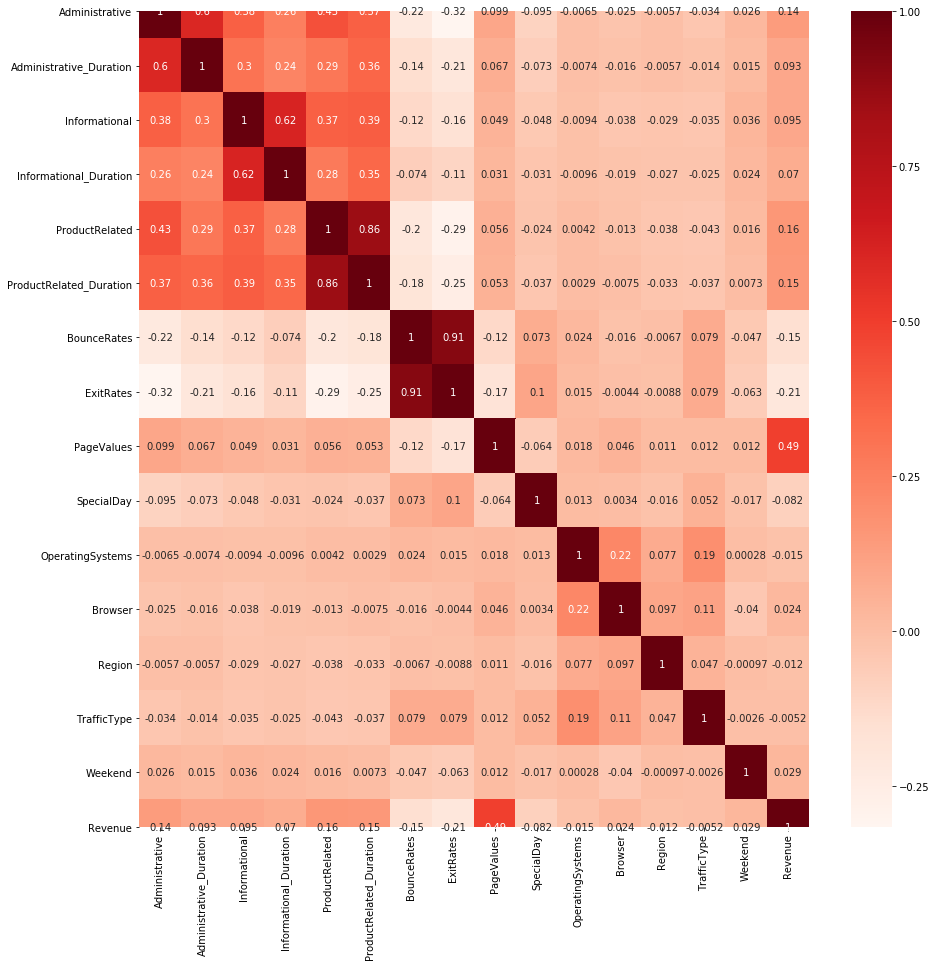

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(15,15))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# **Data Preprocessing**

In [21]:
# Label Encoding
encoder = LabelEncoder()
data['Revenue'] = encoder.fit_transform(data['Revenue'])
data['Revenue'].value_counts()
# 0 True
# 1 False

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    10408
1     1908
Name: Revenue, dtype: int64

In [22]:
data['Weekend']= encoder.fit_transform(data['Weekend'])
data['Weekend'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    9451
1    2865
Name: Weekend, dtype: int64

In [23]:
data['Month']= encoder.fit_transform(data['Month'])
data['Month'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


6    3363
7    2998
5    1894
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [24]:
data['VisitorType']= encoder.fit_transform(data['VisitorType'])
data['VisitorType'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2    10537
0     1694
1       85
Name: VisitorType, dtype: int64

In [0]:
data_main= data.drop('Revenue', axis= 1)
labels=  data['Revenue'].copy()

In [26]:
print("Shape of data: %s\nShape of labels: %s"%(data_main.shape, labels.shape))

Shape of data: (12316, 17)
Shape of labels: (12316,)


In [0]:
# 80-20 Split ratio
X_train, X_test, y_train, y_test = train_test_split(data_main, labels, test_size = 0.2, random_state = 0)

In [28]:
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9852, 17)
Shape of y_train : (9852,)
Shape of X_test : (2464, 17)
Shape of y_test : (2464,)


# **Machine Learning Algorithms** 

### **Logistic Regression**

In [29]:
from sklearn.linear_model import LogisticRegression

clf_1= LogisticRegression()
clf_1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
pred= clf_1.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
acc_dict= dict()

In [50]:
from sklearn.metrics import accuracy_score
log_acc= accuracy_score(y_test, pred)
log_acc=log_acc*100
acc_dict['Logistic Regression']=log_acc
print(log_acc)

85.3896103896104


### **Support Vector Classifier**

In [32]:
from sklearn.svm import SVC
clf_2= SVC()
clf_2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
pred= clf_2.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
from sklearn.metrics import accuracy_score
svc_acc= accuracy_score(y_test, pred)
svc_acc= svc_acc*100
acc_dict['SVC Classifier']=svc_acc
print(svc_acc)

85.3896103896104


### **Stochastic Gradient Descent Classifier**

In [35]:
from sklearn.linear_model import SGDClassifier
clf_3= SGDClassifier()
clf_3.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
pred= clf_3.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
from sklearn.metrics import accuracy_score
sgd_acc= accuracy_score(y_test, pred)
sgd_acc=sgd_acc*100
acc_dict['SGD Classifier']=sgd_acc
print(sgd_acc)

85.3896103896104


### **Decision Tree Classifier**

In [39]:
from sklearn.tree import DecisionTreeClassifier

clf_4= DecisionTreeClassifier(random_state=0)
clf_4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [40]:
pred= clf_4.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
dt_acc= accuracy_score(y_test, pred)
dt_acc= dt_acc*100
acc_dict['Decision Tree']=dt_acc
print(dt_acc)

85.3896103896104


### **Naive Bayes (GaussianNB) Classifier**

In [43]:
from sklearn.naive_bayes import GaussianNB
clf_5= GaussianNB()
clf_5.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
pred= clf_5.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
nb_acc= accuracy_score(y_test, pred)
nb_acc= nb_acc*100
acc_dict['NB Classifier']= nb_acc
print(nb_acc)

85.3896103896104


### **MLP Classifier (Neural Network)**

In [59]:
from sklearn.neural_network import MLPClassifier
clf_7= MLPClassifier(hidden_layer_sizes=(1024, ), 
                     activation= 'relu', 
                     solver= 'adam', 
                     alpha=0.0001, 
                     batch_size= 32,
                     learning_rate_init=0.001,
                     shuffle=True,
                     random_state=0
                     )

clf_7.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1024,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [61]:
pred= clf_7.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
mlp_acc= accuracy_score(y_test, pred)
mlp_acc= mlp_acc*100
acc_dict['MLP Classifier']= mlp_acc
print(mlp_acc)

88.83928571428571


### **Deep Neural Network**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

clf_8= Sequential()
clf_8.add(Dense(256, activation='relu'))
clf_8.add(Dropout(0.25))
clf_8.add(Dense(512, activation='relu'))
clf_8.add(Dropout(0.25))
clf_8.add(Dense(1024, activation='relu'))
clf_8.add(Dropout(0.25))
clf_8.add(Dense(2048, activation='relu'))
clf_8.add(Dropout(0.25))
clf_8.add(Dense(1, activation='sigmoid'))

In [0]:
from keras.optimizers import Adam

clf_8.compile(optimizer=Adam(lr=0.001) , metrics=['accuracy'], loss='binary_crossentropy')

In [80]:
clf_8_hist= clf_8.fit(X_train.values, y_train.values, 
                      shuffle= True,
                      validation_data= (X_test.values, y_test.values)
                    )

Train on 9852 samples, validate on 2464 samples
Epoch 1/1
9852/9852 [==============================] - 21s 2ms/step - loss: 2.5064 - acc: 0.8445 - val_loss: 2.4596 - val_acc: 0.8474


In [87]:
nn_acc= clf_8_hist.history['acc'][0]*100
acc_dict['Deep Neural Network']= nn_acc
print(nn_acc)

84.44985789929373


### **Random Forest Classifier**

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf_9= RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)

clf_9.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [90]:
pred= clf_9.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
random_forest_acc= accuracy_score(y_test, pred)
random_forest_acc= random_forest_acc*100
acc_dict['Random Forest Classifier']= random_forest_acc
print(random_forest_acc)

84.74025974025975


### **K Neighbors Classifier**

In [93]:
from sklearn.neighbors import KNeighborsClassifier

clf_10= KNeighborsClassifier()
clf_10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [95]:
pred= clf_10.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
kn_acc= accuracy_score(y_test, pred)
kn_acc= kn_acc*100
acc_dict['KNeigbors Classifier']= kn_acc
print(kn_acc)

86.81006493506493


# **Accuracy Comparision**

In [99]:
acc_dict

{'Decision Tree': 85.3896103896104,
 'Deep Neural Network': 84.44985789929373,
 'KNeigbors Classifier': 86.81006493506493,
 'Logistic Regression': 85.3896103896104,
 'MLP Classifier': 88.83928571428571,
 'NB Classifier': 85.3896103896104,
 'Random Forest Classifier': 84.74025974025975,
 'SGD Classifier': 85.3896103896104,
 'SVC Classifier': 85.3896103896104}

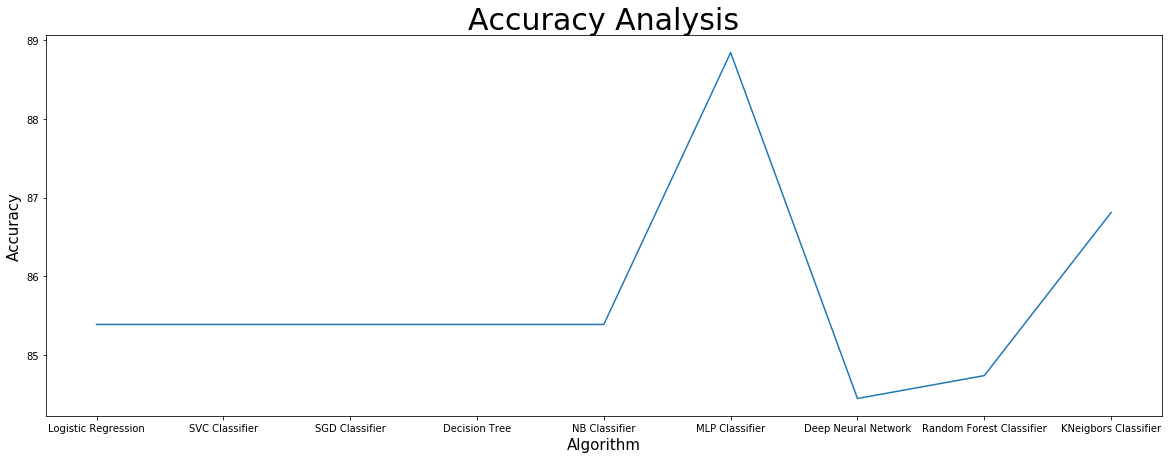

In [108]:
plt.rcParams['figure.figsize'] = (20, 7)
x_axis= list(acc_dict.keys())
y_axis= list(acc_dict.values())
plt.plot(x_axis, y_axis)
plt.title('Accuracy Analysis', fontsize = 30)
plt.xlabel('Algorithm', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

In [112]:
import operator
selected_classifier= max(acc_dict.items(), key=operator.itemgetter(1))[0]

print("%s has highest accuracy value."%(selected_classifier))

MLP Classifier has highest accuracy value.
